In [142]:
import pandas as pd
import numpy as np
import urllib2
from bs4 import BeautifulSoup
from imdbpie import Imdb
from time import sleep
import time
import requests
import string
import csv
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
shows = pd.read_csv('scraped_data3.csv')
shows.drop('Unnamed: 0', inplace=True, axis=1)

In [329]:
shows.drop('parental_rating', inplace=True, axis=1)
shows.drop('metascore', inplace=True, axis=1)

In [327]:
pd.set_option("display.max_columns", 100)

In [336]:
pd.set_option('max_seq_items', 200)

### columns to drop:
metascore (done)

parental rating (done)

In [330]:
shows.head(10)

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,imdb_rating,release_date,plot,year,type,votes,keywords,first_year,is_new,fixed_runtime,is_action,is_adventure,is_animation,is_biography,is_comedy,is_crime,is_documentary,is_drama,is_family,is_fantasy,is_game,is_history,is_horror,is_music,is_musical,is_mystery,is_news,is_reality,is_romance,is_sci,is_short,is_sport,is_talk,is_thriller,is_war,is_western,release_month,release_weekday,release_monthday,stemmed_plot,...,keyword_gay,keyword_girl,keyword_girlfriend,keyword_hero,keyword_humor,keyword_husband,keyword_interraci,keyword_interview,keyword_investig,keyword_joke,keyword_life,keyword_live,keyword_love,keyword_male,keyword_man,keyword_marriag,keyword_mother,keyword_murder,keyword_new,keyword_offic,keyword_parent,keyword_parodi,keyword_play,keyword_polic,keyword_power,keyword_protagonist,keyword_relationship,keyword_satir,keyword_school,keyword_secret,keyword_sex,keyword_share,keyword_sister,keyword_sitcom,keyword_social,keyword_son,keyword_spoken,keyword_spoof,keyword_stand,keyword_student,keyword_superhero,keyword_supernatur,keyword_surreal,keyword_teenag,keyword_versu,keyword_villain,keyword_violenc,keyword_wife,keyword_woman,keyword_york
0,"{u'imdbID': u'tt3523560', u'Title': u'Little C...",January 12 - Little Charmers,1,Little Charmers,tt3523560,"{u'totalSeasons': u'2', u'Plot': u'Hip and edg...",2,0,NaN,Animation,6.4,2015-01-12,hip and edge animation that welcomes to a worl...,2015–,series,65,,2015,1,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,12.0,"[hip, and, edg, anim, that, welcom, to, a, wor...",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"{u'imdbID': u'tt3596178', u'Title': u'Bella an...",January 17 - Bella and the Bulldogs,1,Bella and the Bulldogs,tt3596178,"{u'totalSeasons': u'2', u'Plot': u'Follows a p...",2,0,30 min,"Comedy, Family",5.1,2015-01-17,follows a perky head cheerleader named bella w...,2015–2016,series,848,texas cheerleader high school football footbal...,2015,1,30.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,6.0,17.0,"[follow, a, perki, head, cheerlead, name, bell...",...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,"{u'imdbID': u'tt3521854', u'Title': u'Power Ra...",February 7 - Power Rangers Dino Charge,1,Power Rangers Dino Charge,tt3521854,"{u'totalSeasons': u'2', u'Plot': u'On prehisto...",2,0,21 min,"Action, Adventure, Fantasy",7.0,2015-02-07,on prehistoric earth an alien entrusted powerf...,2015–,series,547,power rangers,2015,1,21.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,6.0,7.0,"[on, prehistor, earth, an, alien, entrust, pow...",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"{u'imdbID': u'tt3219170', u'Title': u'Harvey B...",March 29 - Harvey Beaks,1,Harvey Beaks,tt3219170,"{u'totalSeasons': u'2', u'Plot': u'A mild-mann...",2,0,22 min,"Animation, Comedy, Family",6.9,2015-03-29,a mildmannered young bird and his best friends...,2015–,series,646,,2015,1,22.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0.0,29.0,"[a, mildmann, young, bird, and, hi, best, frie...",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"{u'imdbID': u'tt4502154', u'Title': u'Make It ...",April 9 - Make It Pop,1,Make It Pop,tt4502154,"{u'totalSeasons': u'3', u'Plot': u'Sun Hi, Jod...",3,0,30 min,"Comedy, Drama, Musical",5.7,2015-03-26,sun hi jodi and corki are three girls with dif...,2015–,series,364,,2015,1,30.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3.0,4.0,26.0,"[sun, hi, jodi, and, corki, are, three, girl, ...",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"{u'imdbID': u'tt4452630', u'Title': u'Code Bla...",September 30 - Code Black,1,Code Black,tt4452630,"{u'totalSeasons': u'2', 

In [4]:
shows.shape

(2590, 21)

In [5]:
## the number of cancelled vs not cancelled shows
shows['cancelled'].value_counts()


0    1689
1     901
Name: cancelled, dtype: int64

In [6]:
print "Baseline probability of a show being cancelling in season 1 is: ", 901.0/2590

Baseline probability of a show being cancelling in season 1 is:  0.347876447876


In [7]:
shows.dtypes

json                object
title_rough         object
check                int64
title               object
imdb_id             object
big_json            object
seasons              int64
cancelled            int64
runtime             object
genres              object
parental_rating     object
imdb_rating        float64
release_date        object
plot                object
year                object
type                object
votes               object
metascore          float64
keywords            object
first_year           int64
is_new               int64
dtype: object

In [8]:
shows.isnull().sum()

json                  0
title_rough           0
check                 0
title                 0
imdb_id               0
big_json              0
seasons               0
cancelled             0
runtime             599
genres               80
parental_rating    1737
imdb_rating          70
release_date        221
plot                473
year                  0
type                  0
votes                71
metascore          2590
keywords              0
first_year            0
is_new                0
dtype: int64

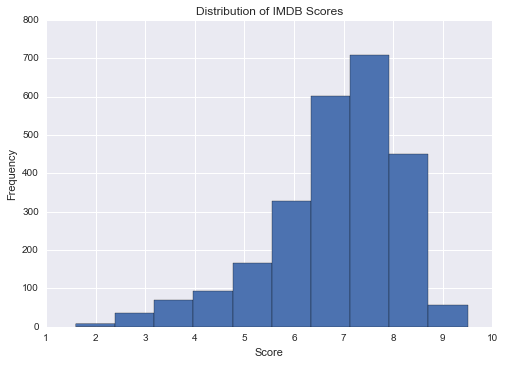

In [9]:
## distribution of IMDB scores

plt.hist(shows['imdb_rating'].dropna())
plt.title('Distribution of IMDB Scores')
plt.ylabel('Frequency')
plt.xlabel('Score')

In [10]:
shows.shape

(2590, 21)

In [11]:
## there seem to be a few shows that started prior to 1980
shows[shows['first_year'] >= 1980].shape

(2573, 21)

In [12]:
newshows = shows[shows['first_year'] >= 1980]

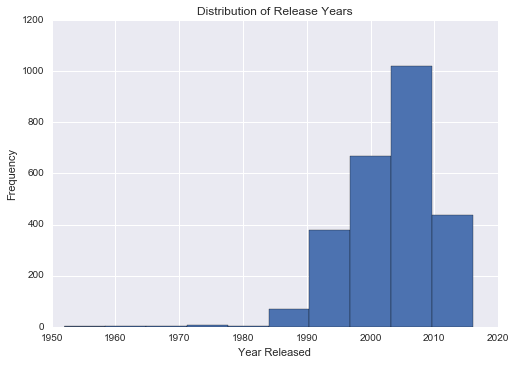

In [13]:
## distribution of release year
plt.hist(shows['first_year'].dropna())
plt.title('Distribution of Release Years')
plt.ylabel('Frequency')
plt.xlabel('Year Released')

In [14]:
## mean year in dataset
np.mean(shows['first_year'].dropna())

2003.1471042471042

In [15]:
## median year in dataset
np.median(shows['first_year'].dropna())

2005.0

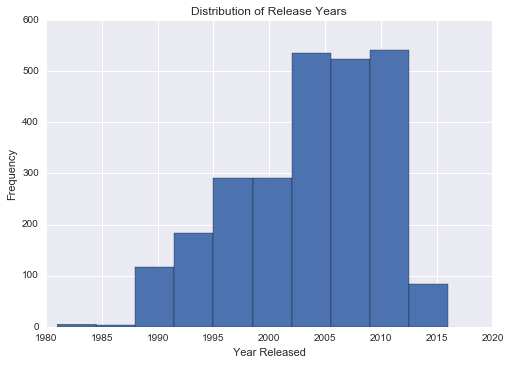

In [16]:
## distribution of release year for only shows starting after 1980
plt.hist(newshows['first_year'])
plt.title('Distribution of Release Years')
plt.ylabel('Frequency')
plt.xlabel('Year Released')

In [17]:
## this funciton cleans runtime

def fix_runtime(runtime):
    return runtime.split(' ')[0]

In [18]:
## cleans the runtime column
shows['fixed_runtime'] = shows['runtime'].dropna().apply(fix_runtime)

In [19]:
## converts cleaned runtime from str to int
shows['fixed_runtime'] = shows['fixed_runtime'].dropna().apply(int)

In [20]:
## i'm pretty sure something is wrong here.
shows['fixed_runtime'].value_counts()

30.0     803
60.0     573
22.0     122
44.0      61
45.0      57
43.0      47
23.0      40
25.0      28
42.0      25
11.0      22
24.0      18
120.0     17
15.0      16
55.0      13
50.0      13
28.0      10
21.0       9
46.0       8
47.0       8
20.0       6
40.0       5
90.0       5
27.0       5
41.0       4
51.0       4
65.0       3
29.0       3
26.0       3
62.0       3
59.0       3
        ... 
522.0      1
608.0      1
376.0      1
9.0        1
306.0      1
284.0      1
272.0      1
270.0      1
467.0      1
197.0      1
75.0       1
185.0      1
86.0       1
64.0       1
94.0       1
100.0      1
650.0      1
57.0       1
56.0       1
110.0      1
53.0       1
118.0      1
125.0      1
49.0       1
48.0       1
131.0      1
136.0      1
154.0      1
156.0      1
720.0      1
Name: fixed_runtime, dtype: int64

In [21]:
shows.dtypes

json                object
title_rough         object
check                int64
title               object
imdb_id             object
big_json            object
seasons              int64
cancelled            int64
runtime             object
genres              object
parental_rating     object
imdb_rating        float64
release_date        object
plot                object
year                object
type                object
votes               object
metascore          float64
keywords            object
first_year           int64
is_new               int64
fixed_runtime      float64
dtype: object

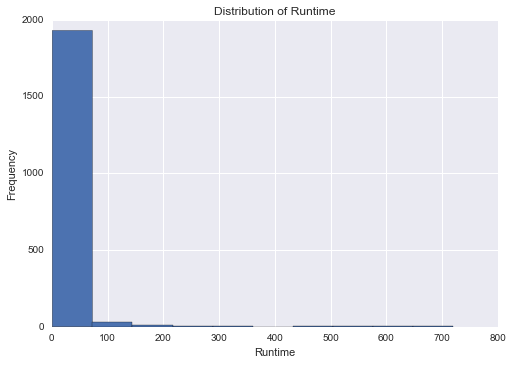

In [22]:
plt.hist(shows['fixed_runtime'].dropna())
plt.title('Distribution of Runtime')
plt.ylabel('Frequency')
plt.xlabel('Runtime')

In [23]:
## the long runtimes may be giving total runtime, not runtime per episode
shows[shows['fixed_runtime'] == 720]

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,...,release_date,plot,year,type,votes,metascore,keywords,first_year,is_new,fixed_runtime
1522,"{u'imdbID': u'tt2431022', u'Title': u'Mankind ...",September 16 - All of Us,1,All of Us,tt2431022,"{u'totalSeasons': u'1', u'Plot': u'Follow-up t...",1,1,720 min,"Documentary, History",...,13 Nov 2012,Follow-up to America: The Story of the US (201...,2012,series,"1,135",NaN,[tv mini series],2012,0,720.0


In [24]:
## there are only about 20 shows with goofy runtimes. could probably drop them. 
## Maybe divide runtime by number of episodes (if I can get that)
shows[shows['fixed_runtime'] >= 200]

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,...,release_date,plot,year,type,votes,metascore,keywords,first_year,is_new,fixed_runtime
332,"{u'imdbID': u'tt0266171', u'Title': u'Outlaw S...",September 15 - Outlaw,1,Outlaw,tt0266171,"{u'totalSeasons': u'1', u'Plot': u'The adventu...",1,1,650 min,"Animation, Comedy, Drama",...,15 Jan 2001,The adventures of an outlaw crew of an advance...,1998–,series,"2,792",NaN,"[spaceship, anime, outlaw, space, based on man...",1998,0,650.0
490,"{u'imdbID': u'tt1379652', u'Title': u'The Grea...",July 6 - The Great Debate,1,The Great Debate,tt1379652,"{u'totalSeasons': u'1', u'Plot': u'N/A', u'Rat...",1,1,300 min,Reality-TV,...,06 Jul 2009,NaN,2009–,series,24,NaN,[],2009,0,300.0
535,"{u'imdbID': u'tt0185906', u'Title': u'Band of ...",September 25 - Brothers,1,Brothers,tt0185906,"{u'totalSeasons': u'1', u'Plot': u'This is the...",1,1,594 min,"Action, Drama, History",...,09 Sep 2001,"This is the story of ""E"" Easy Company, 506th R...",2001,series,"239,408",NaN,"[airborne troops, american abroad, u.s. soldie...",2001,0,594.0
558,"{u'imdbID': u'tt1568937', u'Title': u'Ancients...",November 6 - Ancients Behaving Badly,1,Ancients Behaving Badly,tt1568937,"{u'totalSeasons': u'1', u'Plot': u'This docume...",1,1,376 min,"Documentary, Biography, History",...,06 Nov 2009,This documentary explores some of the psycholo...,2009–,series,123,NaN,[],2009,0,376.0
931,"{u'imdbID': u'tt0830361', u'Title': u'The Lost...",December 11 - The Lost Room,1,The Lost Room,tt0830361,"{u'totalSeasons': u'1', u'Plot': u'Detective J...",1,1,270 min,"Action, Fantasy, Mystery",...,11 Dec 2006,Detective Joe Miller comes into possession of ...,2006,series,"24,005",NaN,"[cursed object, teleportation, tv mini series]",2006,0,270.0
1245,"{u'imdbID': u'tt0461110', u'Title': u'TransGen...",September 20 - TransGeneration,1,TransGeneration,tt0461110,"{u'totalSeasons': u'1', u'Plot': u'A look at t...",1,1,272 min,Documentary,...,20 Sep 2005,A look at the lives of four college students u...,2005,series,308,NaN,"[gender transition, gender, college student, c...",2005,0,272.0
1287,"{u'imdbID': u'tt5275892', u'Title': u'O.J.: Ma...",January 6 - Made in America,1,Made in America,tt5275892,"{u'totalSeasons': u'1', u'Plot': u'It is the d...",1,1,467 min,"Documentary, Biography, Crime",...,11 Jun 2016,It is the defining cultural tale of modern Ame...,2016,series,"3,076",NaN,"[celebrity, racism, investigation, justice sys...",2016,1,467.0
1306,"{u'imdbID': u'tt0324864', u'Title': u'Kingdom ...",March 3 - Kingdom Hospital,1,Kingdom Hospital,tt0324864,"{u'totalSeasons': u'1', u'Plot': u'Shocking an...",1,1,608 min,"Drama, Fantasy, Horror",...,03 Mar 2004,Shocking and frightening tale of a haunted hos...,2004–,series,"6,147",NaN,"[hospital, maine, talking animal, ambulance, g...",2004,0,608.0
1479,"{u'imdbID': u'tt0329476', u'Title': u'Out of O...",June 1 - Out of Order,1,Out of Order,tt0329476,"{u'totalSeasons': u'N/A', u'Plot': u'Mark Colm...",0,0,200 min,"Drama, Romance",...,01 Jun 2003,Mark Colm is a family man torn between his lov...,2003,series,616,NaN,"[female nudity, group sex, braless, unfaithful...",2003,0,200.0
1522,"{u'imdbID': u'tt2431022', u'Title': u'Mankind ...",September 16 - All of Us,1,All of Us,tt2431022,"{u'totalSeasons': u'1', u'Plot': u'Follow-up t...",1,1,720 min,"Documentary, History",...,13 Nov 2012,Follow-up to America: The Story of the US (201...,2012,series,"1,135",NaN,[tv mini series],2012,0,720.0


In [25]:
real_runtimes = shows[shows['fixed_runtime'] <= 100]

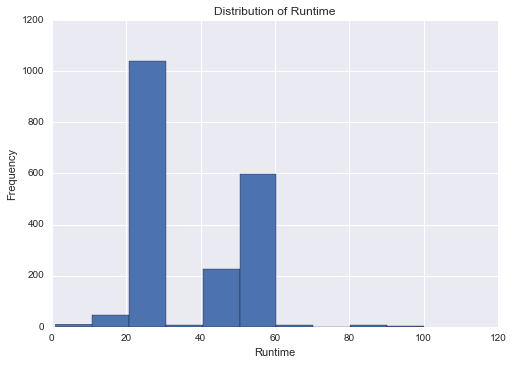

In [26]:
## histogram of runtimes that are less than 100
plt.hist(real_runtimes['fixed_runtime'].dropna())
plt.title('Distribution of Runtime')
plt.ylabel('Frequency')
plt.xlabel('Runtime')

## Keywords

In [27]:
## using count vectorizer to find the 50 most common keywords

In [280]:
## keywords have some strange formatting problems. Trying to fix them.
def fix_keywords(string):
    string = string.replace("[", "")
    string = string.replace(']', "")
    if len(string) == 0:
        return "none"
    else:
        return string

In [287]:
## removes punctuation
def remove_punctuation(text):
    exclude = set(string.punctuation)
    return "".join(ch for ch in text if ch not in exclude)

In [288]:
shows['keywords'] = shows['keywords'].apply(remove_punctuation)

In [292]:
shows['keywords'][2]

'power rangers'

In [286]:
fix_keywords(shows['keywords'][8])

'chip in head'

In [309]:
## this function takes a string of text, splits it into words, then uses Porter Stemmer.
## returns as a string, not list of strings

def split_and_stem2(string):
    string = string.split(' ')
    temp = ''
    for i in string:
        try:
            word = i.decode("ascii", "replace")
        except:
            print i
            break
        word = stemmer.stem(word)
#         temp.append(word)
        temp += word + " "
    return temp

In [310]:
split_and_stem2(shows['keywords'][5])

u'hospit medic lo angel california latex glove doctor nurs '

In [311]:
## stemmed keywords
shows['stemmed_keywords'] = shows['keywords'].dropna().apply(split_and_stem2)

In [312]:
shows[['stemmed_keywords', 'keywords']].head(10)

,stemmed_keywords,keywords
0,,
1,texa cheerlead high school footbal footbal pla...,texas cheerleader high school football footbal...
2,power ranger,power rangers
3,,
4,,
5,hospit medic lo angel california latex glove d...,hospital medical los angeles california latex ...
6,witch,witch
7,texa ranger femal lead remak base on tv seri,texas ranger female lead remake based on tv se...
8,chip in head,chip in head
9,scientist cdc outbreak arctic pandem center fo...,scientist cdc outbreak arctic pandemic centers...


In [313]:
cv = CountVectorizer(stop_words='english', max_features=100, binary=True)

In [314]:
vectorized = cv.fit_transform(shows['stemmed_keywords']).todense()
vectorized = pd.DataFrame(vectorized, columns=cv.get_feature_names())

In [315]:
common_keywords = vectorized.columns

In [316]:
## number of times each keyword is used
## maybe look at the top 100

for i in vectorized.columns:
    print i, vectorized[i].sum()

1990 86
2000 121
2010 67
actor 160
adult 68
african 106
alien 71
american 182
angel 68
anim 191
base 258
best 84
black 110
book 90
boy 146
boyfriend 90
brother 196
california 122
celebr 89
charact 564
child 115
citi 146
comedi 201
comedian 84
comic 79
cult 176
daughter 171
death 116
detect 94
doctor 72
evil 83
ex 68
famili 284
father 251
femal 298
fiction 301
film 69
friend 217
friendship 249
gay 98
girl 192
girlfriend 88
glass 67
hero 101
high 130
humor 136
husband 155
interraci 110
interview 74
investig 84
joke 92
lead 72
life 70
live 117
love 112
male 77
man 150
marriag 78
mother 193
murder 111
new 127
non 249
number 104
offic 76
parent 75
parodi 70
play 97
polic 137
power 116
protagonist 144
relationship 594
satir 106
school 181
secret 90
seri 219
sex 126
share 67
sister 164
sitcom 244
social 80
son 218
spoken 76
spoof 85
stand 81
student 72
superhero 71
supernatur 88
surreal 164
talk 97
teenag 215
televis 97
titl 910
tv 317
versu 69
villain 68
violenc 85
wife 158
woman 116
word 37

In [317]:
common_keywords

Index([u'1990', u'2000', u'2010', u'actor', u'adult', u'african', u'alien',
       u'american', u'angel', u'anim', u'base', u'best', u'black', u'book',
       u'boy', u'boyfriend', u'brother', u'california', u'celebr', u'charact',
       u'child', u'citi', u'comedi', u'comedian', u'comic', u'cult',
       u'daughter', u'death', u'detect', u'doctor', u'evil', u'ex', u'famili',
       u'father', u'femal', u'fiction', u'film', u'friend', u'friendship',
       u'gay', u'girl', u'girlfriend', u'glass', u'hero', u'high', u'humor',
       u'husband', u'interraci', u'interview', u'investig', u'joke', u'lead',
       u'life', u'live', u'love', u'male', u'man', u'marriag', u'mother',
       u'murder', u'new', u'non', u'number', u'offic', u'parent', u'parodi',
       u'play', u'polic', u'power', u'protagonist', u'relationship', u'satir',
       u'school', u'secret', u'seri', u'sex', u'share', u'sister', u'sitcom',
       u'social', u'son', u'spoken', u'spoof', u'stand', u'student',
       u'super

In [230]:
## edited the vectorized list of keywords. Removed numbers, words like "tv", "show", "new", "character", 
## and words that have shorter versions in the list (e.g. removed 'relationships' if 'relationship' was already in)

keywords_to_use = ['adult', u'african', u'alien',
       u'american', u'animal', u'animation',
       u'black', u'book', u'boy', u'brother', u'california',
       u'celebrity', u'child', u'city', u'comedian', u'comedy',
       u'comic', u'cult', u'daughter', u'death', u'detective', u'doctor',
       u'evil', u'family', u'father', u'female', u'fiction', u'film',
       u'friend', u'friendship', u'gay', u'girl', u'glasses',
       u'hero', u'high', u'humor', u'husband', u'interracial', u'interview',
       u'investigation', u'joke', u'life', u'love', u'male', u'man',
       u'marriage', u'mother', u'murder',
       u'nudity', u'parody', u'police', u'power',
       u'relationship', u'satire', u'school',
       u'secret', u'sex', u'sister', u'sitcom', u'social', u'son',
       u'spoof', u'student', u'superhero',
       u'supernatural', u'surrealism', u'teenage',
       u'versus', u'villain', u'violence', u'wife', u'woman',
       u'york']

In [318]:
keywords_to_use_2 = [u'adult', u'african', u'alien',
       u'american', u'angel', u'anim', u'base', u'best', u'black', u'book',
       u'boy', u'boyfriend', u'brother', u'california', u'celebr', u'charact',
       u'child', u'citi', u'comedi', u'comedian', u'comic', u'cult',
       u'daughter', u'death', u'detect', u'doctor', u'evil', u'famili',
       u'father', u'femal', u'fiction',u'friend', u'friendship',
       u'gay', u'girl', u'girlfriend', u'hero', u'humor',
       u'husband', u'interraci', u'interview', u'investig', u'joke',
       u'life', u'live', u'love', u'male', u'man', u'marriag', u'mother',
       u'murder', u'new',u'offic', u'parent', u'parodi',
       u'play', u'polic', u'power', u'protagonist', u'relationship', u'satir',
       u'school', u'secret',u'sex', u'share', u'sister', u'sitcom',
       u'social', u'son', u'spoken', u'spoof', u'stand', u'student',
       u'superhero', u'supernatur', u'surreal', u'teenag',
       u'versu', u'villain', u'violenc', u'wife', u'woman',
       u'york']

In [ ]:
## I know this syntax works
# genre_names = ['action', u'adventure', u'animation', u'biography', u'comedy',
#        u'crime', u'documentary', u'drama', u'family', u'fantasy',
#        u'game', u'history', u'horror', u'music', u'musical', u'mystery',
#        u'news', u'reality', u'romance', u'sci', u'short', u'sport', u'talk',
#        u'thriller', u'war', u'western']

# for i in genre_names:
#     shows['is_%s' % i] = shows['genres'].apply(lambda x: 1 if i in x.lower() else 0)

In [323]:
for i in keywords_to_use_2:
    shows['keyword_%s' % i] = shows['stemmed_keywords'].apply(lambda x: 1 if i in x else 0)

## Genres

In [32]:
## using count vectorizer to get the genres

In [33]:
genre_vectors = cv.fit_transform(shows['genres'].dropna()).todense()
genre_vectors = pd.DataFrame(genre_vectors, columns=cv.get_feature_names())

In [34]:
genre_vectors.shape

(2510, 28)

In [35]:
genre_vectors.columns

Index([u'action', u'adventure', u'animation', u'biography', u'comedy',
       u'crime', u'documentary', u'drama', u'family', u'fantasy', u'fi',
       u'game', u'history', u'horror', u'music', u'musical', u'mystery',
       u'news', u'reality', u'romance', u'sci', u'short', u'sport', u'talk',
       u'thriller', u'tv', u'war', u'western'],
      dtype='object')

In [36]:
len(genre_vectors.columns)

28

In [37]:
for i in genre_vectors.columns:
    print i, genre_vectors[i].sum()

action 262
adventure 201
animation 390
biography 13
comedy 1041
crime 210
documentary 164
drama 637
family 307
fantasy 76
fi 109
game 128
history 37
horror 44
music 83
musical 14
mystery 127
news 38
reality 500
romance 142
sci 109
short 2
sport 67
talk 88
thriller 46
tv 500
war 8
western 9


In [38]:
## sci and fi are redundant, as are reality and tv

In [39]:
shows.columns

Index([u'json', u'title_rough', u'check', u'title', u'imdb_id', u'big_json',
       u'seasons', u'cancelled', u'runtime', u'genres', u'parental_rating',
       u'imdb_rating', u'release_date', u'plot', u'year', u'type', u'votes',
       u'metascore', u'keywords', u'first_year', u'is_new', u'fixed_runtime'],
      dtype='object')

In [40]:
shows.dtypes

json                object
title_rough         object
check                int64
title               object
imdb_id             object
big_json            object
seasons              int64
cancelled            int64
runtime             object
genres              object
parental_rating     object
imdb_rating        float64
release_date        object
plot                object
year                object
type                object
votes               object
metascore          float64
keywords            object
first_year           int64
is_new               int64
fixed_runtime      float64
dtype: object

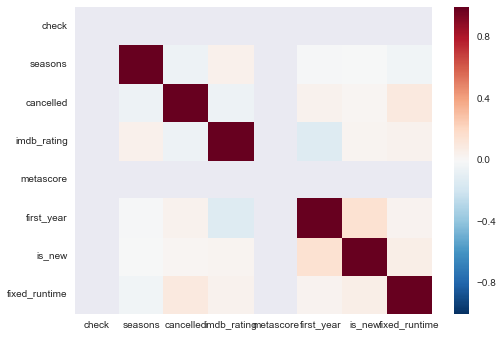

In [41]:
## shows the correlations among all existing features
sns.heatmap(shows.corr())

In [42]:
shows.isnull().sum()

json                  0
title_rough           0
check                 0
title                 0
imdb_id               0
big_json              0
seasons               0
cancelled             0
runtime             599
genres               80
parental_rating    1737
imdb_rating          70
release_date        221
plot                473
year                  0
type                  0
votes                71
metascore          2590
keywords              0
first_year            0
is_new                0
fixed_runtime       599
dtype: int64

In [43]:
## fill NA in 'genres'
shows['genres'].fillna('missing', inplace=True)

In [44]:
## create dummy variables of all of the genres
genre_names = ['action', u'adventure', u'animation', u'biography', u'comedy',
       u'crime', u'documentary', u'drama', u'family', u'fantasy',
       u'game', u'history', u'horror', u'music', u'musical', u'mystery',
       u'news', u'reality', u'romance', u'sci', u'short', u'sport', u'talk',
       u'thriller', u'war', u'western']

for i in genre_names:
    shows['is_%s' % i] = shows['genres'].apply(lambda x: 1 if i in x.lower() else 0)

In [47]:
shows.sum()

check                2590.0
seasons              9864.0
cancelled             901.0
imdb_rating         17260.7
metascore               0.0
first_year        5188151.0
is_new                 19.0
fixed_runtime       89688.0
is_action             262.0
is_adventure          201.0
is_animation          390.0
is_biography           13.0
is_comedy            1041.0
is_crime              210.0
is_documentary        164.0
is_drama              637.0
is_family             307.0
is_fantasy             76.0
is_game               128.0
is_history             37.0
is_horror              44.0
is_music               97.0
is_musical             14.0
is_mystery            127.0
is_news                38.0
is_reality            500.0
is_romance            142.0
is_sci                109.0
is_short                2.0
is_sport               67.0
is_talk                88.0
is_thriller            46.0
is_war                  8.0
is_western              9.0
dtype: float64

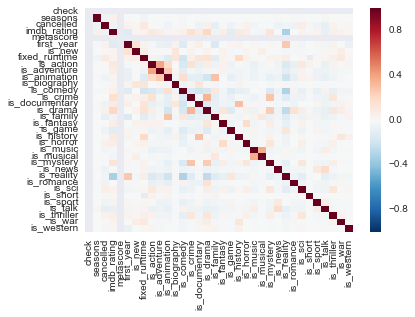

In [73]:
sns.heatmap(shows.corr())

In [51]:
shows.head()

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,...,is_news,is_reality,is_romance,is_sci,is_short,is_sport,is_talk,is_thriller,is_war,is_western
0,"{u'imdbID': u'tt3523560', u'Title': u'Little C...",January 12 - Little Charmers,1,Little Charmers,tt3523560,"{u'totalSeasons': u'2', u'Plot': u'Hip and edg...",2,0,NaN,Animation,...,0,0,0,0,0,0,0,0,0,0
1,"{u'imdbID': u'tt3596178', u'Title': u'Bella an...",January 17 - Bella and the Bulldogs,1,Bella and the Bulldogs,tt3596178,"{u'totalSeasons': u'2', u'Plot': u'Follows a p...",2,0,30 min,"Comedy, Family",...,0,0,0,0,0,0,0,0,0,0
2,"{u'imdbID': u'tt3521854', u'Title': u'Power Ra...",February 7 - Power Rangers Dino Charge,1,Power Rangers Dino Charge,tt3521854,"{u'totalSeasons': u'2', u'Plot': u'On prehisto...",2,0,21 min,"Action, Adventure, Fantasy",...,0,0,0,0,0,0,0,0,0,0
3,"{u'imdbID': u'tt3219170', u'Title': u'Harvey B...",March 29 - Harvey Beaks,1,Harvey Beaks,tt3219170,"{u'totalSeasons': u'2', u'Plot': u'A mild-mann...",2,0,22 min,"Animation, Comedy, Family",...,0,0,0,0,0,0,0,0,0,0
4,"{u'imdbID': u'tt4502154', u'Title': u'Make It ...",April 9 - Make It Pop,1,Make It Pop,tt4502154,"{u'totalSeasons': u'3', u'Plot': u'Sun Hi, Jod...",3,0,30 min,"Comedy, Drama, Musical",...,0,0,0,0,0,0,0,0,0,0


In [331]:
shows.columns

Index([              u'json',        u'title_rough',              u'check',
                    u'title',            u'imdb_id',           u'big_json',
                  u'seasons',          u'cancelled',            u'runtime',
                   u'genres',
       ...
        u'keyword_superhero', u'keyword_supernatur',    u'keyword_surreal',
           u'keyword_teenag',      u'keyword_versu',    u'keyword_villain',
          u'keyword_violenc',       u'keyword_wife',      u'keyword_woman',
             u'keyword_york'],
      dtype='object', length=134)

In [87]:
shows[['release_date', 'first_year']]

,release_date,first_year
0,2015-01-12,2015
1,2015-01-17,2015
2,2015-02-07,2015
3,2015-03-29,2015
4,2015-03-26,2015
5,2015-09-30,2015
6,2014-01-01,2014
7,2014-01-07,2014
8,2014-01-07,2014
9,2014-01-10,2014


In [88]:
shows[['release_date', 'first_year']].isnull().sum()

release_date    221
first_year        0
dtype: int64

In [63]:
shows['release_date'].head()

0   2015-01-12
1   2015-01-17
2   2015-02-07
3   2015-03-29
4   2015-03-26
Name: release_date, dtype: datetime64[ns]

### Parsing dates

In [60]:
shows['release_date'] = shows['release_date'].dropna().apply(lambda x: datetime.strptime(x, '%d %b %Y'))

In [324]:
shows.head()

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,...,keyword_superhero,keyword_supernatur,keyword_surreal,keyword_teenag,keyword_versu,keyword_villain,keyword_violenc,keyword_wife,keyword_woman,keyword_york
0,"{u'imdbID': u'tt3523560', u'Title': u'Little C...",January 12 - Little Charmers,1,Little Charmers,tt3523560,"{u'totalSeasons': u'2', u'Plot': u'Hip and edg...",2,0,NaN,Animation,...,0,0,0,0,0,0,0,0,0,0
1,"{u'imdbID': u'tt3596178', u'Title': u'Bella an...",January 17 - Bella and the Bulldogs,1,Bella and the Bulldogs,tt3596178,"{u'totalSeasons': u'2', u'Plot': u'Follows a p...",2,0,30 min,"Comedy, Family",...,0,0,0,1,0,0,0,0,1,0
2,"{u'imdbID': u'tt3521854', u'Title': u'Power Ra...",February 7 - Power Rangers Dino Charge,1,Power Rangers Dino Charge,tt3521854,"{u'totalSeasons': u'2', u'Plot': u'On prehisto...",2,0,21 min,"Action, Adventure, Fantasy",...,0,0,0,0,0,0,0,0,0,0
3,"{u'imdbID': u'tt3219170', u'Title': u'Harvey B...",March 29 - Harvey Beaks,1,Harvey Beaks,tt3219170,"{u'totalSeasons': u'2', u'Plot': u'A mild-mann...",2,0,22 min,"Animation, Comedy, Family",...,0,0,0,0,0,0,0,0,0,0
4,"{u'imdbID': u'tt4502154', u'Title': u'Make It ...",April 9 - Make It Pop,1,Make It Pop,tt4502154,"{u'totalSeasons': u'3', u'Plot': u'Sun Hi, Jod...",3,0,30 min,"Comedy, Drama, Musical",...,0,0,0,0,0,0,0,0,0,0


In [82]:
## adds release month as int
## I probably should have done this in one line
## or do I want to leave it in datetime format?
shows['release_month'] = shows['release_date'].dropna().apply(lambda x: x.strftime('%m'))
shows['release_month'] = shows['release_month'].dropna().apply(lambda x: str(x))
shows['release_month'] = shows['release_month'].dropna().apply(lambda x: int(x))

In [83]:
## adds release day of the week as int
shows['release_weekday'] = shows['release_date'].dropna().apply(lambda x: x.strftime('%w'))
shows['release_weekday'] = shows['release_weekday'].dropna().apply(lambda x: str(x))
shows['release_weekday'] = shows['release_weekday'].dropna().apply(lambda x: int(x))

In [84]:
## adds release day of the month as int
shows['release_monthday'] = shows['release_date'].dropna().apply(lambda x: x.strftime('%d'))
shows['release_monthday'] = shows['release_monthday'].dropna().apply(lambda x: str(x))
shows['release_monthday'] = shows['release_monthday'].dropna().apply(lambda x: int(x))

### Cleaning text

In [91]:
shows['plot'].head()

0    Hip and edge animation that welcomes to a worl...
1    Follows a perky head cheerleader named Bella w...
2    On prehistoric Earth, an alien entrusted power...
3    A mild-mannered young bird and his best friend...
4    Sun Hi, Jodi and Corki are three girls with di...
Name: plot, dtype: object

In [92]:
## this function removes punctuation from a string
def remove_punctuation(text):
    exclude = set(string.punctuation)
    return "".join(ch for ch in text if ch not in exclude)

In [96]:
## makes plot text lowercase
shows['plot'] = shows['plot'].dropna().apply(lambda x: x.lower())
## removes punctuation from plot text
shows['plot'] = shows['plot'].dropna().apply(remove_punctuation)

In [97]:
shows['plot'].head()

0    hip and edge animation that welcomes to a worl...
1    follows a perky head cheerleader named bella w...
2    on prehistoric earth an alien entrusted powerf...
3    a mildmannered young bird and his best friends...
4    sun hi jodi and corki are three girls with dif...
Name: plot, dtype: object

In [98]:
## I could remove stopwords now, or do it as part of the TFIDF
## I could extract single words, or use ngrams

In [120]:
## this function removes stopwords
def remove_stopwords(x):
    lower = x.lower()
    split = lower.split(" ")
    final = []
    for i in split:
        if i not in stopwords.words('english'):
            final.append(i)
    return final

In [350]:
## remove stopwords from plot summaries
shows['plot'] = shows['plot'].dropna().apply(remove_stopwords)

/Users/christophereppig/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [351]:
shows['plot'].head()

0    [hip, edge, animation, welcomes, world, magic,...
1    [follows, perky, head, cheerleader, named, bel...
2    [prehistoric, earth, alien, entrusted, powerfu...
3    [mildmannered, young, bird, best, friends, pai...
4    [sun, hi, jodi, corki, three, girls, different...
Name: plot, dtype: object

In [353]:
shows['plot'][0]

['hip',
 'edge',
 'animation',
 'welcomes',
 'world',
 'magic',
 'imagination',
 'little',
 'patience',
 'determination',
 'flick',
 'magic',
 'wands',
 'anything',
 'possible']

In [354]:
toy_words = ['hip',
 'edge',
 'animation',
 'welcomes',
 'world',
 'magic',
 'imagination',
 'little',
 'patience',
 'determination',
 'flick',
 'magic',
 'wands',
 'anything',
 'possible']

In [365]:
def reassemble_plots(list_of_words):    
    bag_of_words = ''
    for i in list_of_words:
        bag_of_words += (i + " ")
    return bag_of_words

In [359]:
shows['plot_cleaned'] = shows['plot'].dropna().apply(reassemble_plots)

In [358]:
reassemble_plots(toy_words)

'hip edge animation welcomes world magic imagination little patience determination flick magic wands anything possible '

#### Stemming Plot Descriptions

# remove stopwords first

In [143]:
stemmer = PorterStemmer()

In [214]:
## this function takes a string of text, splits it into words, then uses Porter Stemmer.

def split_and_stem(string):
    string = string.split(' ')
    temp = []
    for i in string:
        try:
            word = i.decode("ascii", "replace")
        except:
            print i
            break
        word = stemmer.stem(word)
        temp.append(word)
    return temp

In [360]:
## stemming the plot descriptions
shows['stemmed_plot'] = shows['plot_cleaned'].dropna().apply(split_and_stem)

In [361]:
## turns stemmed plot back into single strings
shows['stemmed_plot'] = shows['stemmed_plot'].dropna().apply(reassemble_plots)

In [338]:
shows.columns

Index([                u'json',          u'title_rough',
                      u'check',                u'title',
                    u'imdb_id',             u'big_json',
                    u'seasons',            u'cancelled',
                    u'runtime',               u'genres',
                u'imdb_rating',         u'release_date',
                       u'plot',                 u'year',
                       u'type',                u'votes',
                   u'keywords',           u'first_year',
                     u'is_new',        u'fixed_runtime',
                  u'is_action',         u'is_adventure',
               u'is_animation',         u'is_biography',
                  u'is_comedy',             u'is_crime',
             u'is_documentary',             u'is_drama',
                  u'is_family',           u'is_fantasy',
                    u'is_game',           u'is_history',
                  u'is_horror',             u'is_music',
                 u'is_musical',

In [342]:
## In the current dataset, these are the columns that are useable as predictors
x_columns = [u'first_year', u'fixed_runtime',
                  u'is_action',         u'is_adventure',
               u'is_animation',         u'is_biography',
                  u'is_comedy',             u'is_crime',
             u'is_documentary',             u'is_drama',
                  u'is_family',           u'is_fantasy',
                    u'is_game',           u'is_history',
                  u'is_horror',             u'is_music',
                 u'is_musical',           u'is_mystery',
                    u'is_news',           u'is_reality',
                 u'is_romance',               u'is_sci',
                   u'is_short',             u'is_sport',
                    u'is_talk',          u'is_thriller',
                     u'is_war',           u'is_western',
              u'release_month',      u'release_weekday',
           u'release_monthday',         u'stemmed_plot',
           u'stemmed_keywords',        u'keyword_adult',
            u'keyword_african',        u'keyword_alien',
           u'keyword_american',        u'keyword_angel',
               u'keyword_anim',         u'keyword_base',
               u'keyword_best',        u'keyword_black',
               u'keyword_book',          u'keyword_boy',
          u'keyword_boyfriend',      u'keyword_brother',
         u'keyword_california',       u'keyword_celebr',
            u'keyword_charact',        u'keyword_child',
               u'keyword_citi',       u'keyword_comedi',
           u'keyword_comedian',        u'keyword_comic',
               u'keyword_cult',     u'keyword_daughter',
              u'keyword_death',       u'keyword_detect',
             u'keyword_doctor',         u'keyword_evil',
             u'keyword_famili',       u'keyword_father',
              u'keyword_femal',      u'keyword_fiction',
             u'keyword_friend',   u'keyword_friendship',
                u'keyword_gay',         u'keyword_girl',
         u'keyword_girlfriend',         u'keyword_hero',
              u'keyword_humor',      u'keyword_husband',
          u'keyword_interraci',    u'keyword_interview',
           u'keyword_investig',         u'keyword_joke',
               u'keyword_life',         u'keyword_live',
               u'keyword_love',         u'keyword_male',
                u'keyword_man',      u'keyword_marriag',
             u'keyword_mother',       u'keyword_murder',
             u'keyword_offic',
             u'keyword_parent',       u'keyword_parodi',
               u'keyword_play',        u'keyword_polic',
              u'keyword_power',  u'keyword_protagonist',
       u'keyword_relationship',        u'keyword_satir',
             u'keyword_school',       u'keyword_secret',
                u'keyword_sex',        u'keyword_share',
             u'keyword_sister',       u'keyword_sitcom',
             u'keyword_social',          u'keyword_son',
             u'keyword_spoken',        u'keyword_spoof',
              u'keyword_stand',      u'keyword_student',
          u'keyword_superhero',   u'keyword_supernatur',
            u'keyword_surreal',       u'keyword_teenag',
              u'keyword_versu',      u'keyword_villain',
            u'keyword_violenc',         u'keyword_wife',
              u'keyword_woman',         u'keyword_york']

## target is shows['cancelled']

y_target = ['cancelled']

In [344]:
len(x_columns)

116

In [362]:
shows_good_data = shows[[u'first_year', u'fixed_runtime',
                  u'is_action',         u'is_adventure',
               u'is_animation',         u'is_biography',
                  u'is_comedy',             u'is_crime',
             u'is_documentary',             u'is_drama',
                  u'is_family',           u'is_fantasy',
                    u'is_game',           u'is_history',
                  u'is_horror',             u'is_music',
                 u'is_musical',           u'is_mystery',
                    u'is_news',           u'is_reality',
                 u'is_romance',               u'is_sci',
                   u'is_short',             u'is_sport',
                    u'is_talk',          u'is_thriller',
                     u'is_war',           u'is_western',
              u'release_month',      u'release_weekday',
           u'release_monthday',         u'stemmed_plot',
           u'stemmed_keywords',        u'keyword_adult',
            u'keyword_african',        u'keyword_alien',
           u'keyword_american',        u'keyword_angel',
               u'keyword_anim',         u'keyword_base',
               u'keyword_best',        u'keyword_black',
               u'keyword_book',          u'keyword_boy',
          u'keyword_boyfriend',      u'keyword_brother',
         u'keyword_california',       u'keyword_celebr',
            u'keyword_charact',        u'keyword_child',
               u'keyword_citi',       u'keyword_comedi',
           u'keyword_comedian',        u'keyword_comic',
               u'keyword_cult',     u'keyword_daughter',
              u'keyword_death',       u'keyword_detect',
             u'keyword_doctor',         u'keyword_evil',
             u'keyword_famili',       u'keyword_father',
              u'keyword_femal',      u'keyword_fiction',
             u'keyword_friend',   u'keyword_friendship',
                u'keyword_gay',         u'keyword_girl',
         u'keyword_girlfriend',         u'keyword_hero',
              u'keyword_humor',      u'keyword_husband',
          u'keyword_interraci',    u'keyword_interview',
           u'keyword_investig',         u'keyword_joke',
               u'keyword_life',         u'keyword_live',
               u'keyword_love',         u'keyword_male',
                u'keyword_man',      u'keyword_marriag',
             u'keyword_mother',       u'keyword_murder',
             u'keyword_offic',
             u'keyword_parent',       u'keyword_parodi',
               u'keyword_play',        u'keyword_polic',
              u'keyword_power',  u'keyword_protagonist',
       u'keyword_relationship',        u'keyword_satir',
             u'keyword_school',       u'keyword_secret',
                u'keyword_sex',        u'keyword_share',
             u'keyword_sister',       u'keyword_sitcom',
             u'keyword_social',          u'keyword_son',
             u'keyword_spoken',        u'keyword_spoof',
              u'keyword_stand',      u'keyword_student',
          u'keyword_superhero',   u'keyword_supernatur',
            u'keyword_surreal',       u'keyword_teenag',
              u'keyword_versu',      u'keyword_villain',
            u'keyword_violenc',         u'keyword_wife',
              u'keyword_woman',         u'keyword_york', 'cancelled']].copy()

### Export dataset

In [364]:
shows.to_csv('scraped_data4.csv', encoding='utf-8', index=False)

In [363]:
shows_good_data.to_csv('shows_good_data.csv', encoding='utf-8', index=False)

In [3]:
import pandas as pd

In [4]:
shows1 = pd.read_csv('scraped_data4.csv')
shows1.shape

(2590, 135)

In [5]:
shows2 = pd.read_csv('shows_good_data.csv')



In [6]:
shows2.shape

(2590, 116)

In [8]:
## this is ready to use
shows3 = pd.read_csv('scraped_data5.csv')

In [9]:
shows3.shape

(2590, 148)